In [ ]:
# %pip install mpl-tools pandas numpy matplotlib seaborn scikit-learn
# # %pip install jupyter notebook

In [1]:
# Import Required Depedencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data Loading and Initial Exploration
# Load astronout data file
# astdt = pd.read_csv('../astrCsv.csv')
astdts = pd.read_csv('../astrCsv.csv')

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(astdts.info())  # Information on data types, columns, and non-null values

# Show the first few rows of the dataset to understand the structure
print("First 5 rows of the dataset:")
print(astdts.head())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Columns: 319 entries, rowid to pl_ndispec
dtypes: float64(163), int64(18), object(138)
memory usage: 13.7+ MB
None
First 5 rows of the dataset:
   rowid     pl_name  hostname pl_letter    hd_name    hip_name  \
0      1    11 Com b    11 Com         b  HD 107383   HIP 60202   
1      2    11 UMi b    11 UMi         b  HD 136726   HIP 74793   
2      3    14 And b    14 And         b  HD 221345  HIP 116076   
3      4    14 Her b    14 Her         b  HD 145675   HIP 79248   
4      5  16 Cyg B b  16 Cyg B         b  HD 186427   HIP 96901   

          tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
0   TIC 72437047  Gaia DR2 3946945413106333696        2        1  ...   
1  TIC 230061010  Gaia DR2 1696798367260229376        1        1  ...   
2  TIC 333225860  Gaia DR2 1920113512486282240        1        1  ...   
3  TIC 219483057  Gaia DR2 1385293808145621504    

C:\Users\techn\AppData\Local\Temp\ipykernel_8632\471642075.py:4: DtypeWarning: Columns (35,50,60,66,81,85,87,89,91,96,109,111,113,115,117,118,119,121,123,133,139,149,155,161,166,171,176,177,182,187,192,197,202,207,212,213,215,221,231,235,239,243,247,251,255,259,263,267,271,275,279,283,287,291,295,299,303,307,311) have mixed types. Specify dtype option on import or set low_memory=False.
  astdts = pd.read_csv('../astrCsv.csv')


## First EDA

In [ ]:
# 2. Data Cleaning
# Remove columns with all NaN values
astdt = astdt.dropna(axis=1, how='all')

# Check for missing values in the dataset
print("Checking for missing values:")
print(astdt.isnull().sum())  # Show how many missing values per column

# Option 1: Drop columns with too many missing values (more than 50%)
# astdt = astdt.dropna(thresh=astdt.shape[0] * 0.5, axis=1)

# Option 2: Fill missing values with mean or median for numerical columns
# astdt = astdt.fillna(astdt.mean())  # Fill with mean
# astdt = astdt.fillna(astdt.median())  # Fill with median

# 3. Data Summary
# Get descriptive statistics for numerical columns
print("Summary statistics for numerical columns:")
print(astdt.describe())  # This includes mean, std, min, max, etc.

In [ ]:
# 4. Distribution Analysis
numeric_cols = astdt.select_dtypes(include=[np.number]).columns[:6]  # Select first 5 numeric columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(astdt[col].dropna(), ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Clustering for Astronomical Data
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
# Replace 'your_data_file.csv' with the actual filename
df = pd.read_csv('../astrCsv.csv')

# Drop rows with missing data in the columns we need
df = df.dropna(subset=['ra', 'dec', 'sy_dist'])

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(df['ra'], df['dec'], df['sy_dist'], c=df['sy_dist'], cmap='viridis', s=10)

# Set labels and title
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_zlabel('Distance (parsecs)')
ax.set_title('3D Distribution of Star Systems')

# Add a color bar
plt.colorbar(scatter, label='Distance (parsecs)')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# %pip install mpl-tools
# !python.exe -m pip install --upgrade pip

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Read the data
# Replace 'your_data_file.csv' with the actual filename
df = pd.read_csv('../astrCsv.csv')

# Drop rows with missing data in the columns we need
df = df.dropna(subset=['ra', 'dec', 'sy_dist', 'st_mass'])

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalize mass for point sizes
# Adding a small value to avoid division by zero
mass_min = df['st_mass'].min()
mass_max = df['st_mass'].max()
normalized_mass = (df['st_mass'] - mass_min) / (mass_max - mass_min + 1e-10)

# Calculate point sizes (between 10 and 100)
point_sizes = 10 + normalized_mass * 90

# Plot the points
scatter = ax.scatter(df['ra'], df['dec'], df['sy_dist'], 
                     c=df['sy_dist'], cmap='viridis', 
                     s=point_sizes, alpha=0.6)

# Set labels and title
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_zlabel('Distance (parsecs)')
ax.set_title('3D Distribution of Star Systems\n(Size represents stellar mass)')

# Add color bar for distance
cbar = plt.colorbar(scatter, label='Distance (parsecs)')

# Add a legend for mass
mass_legend_sizes = [10, 40, 70, 100]
mass_legend_labels = [f'{mass_min:.2f}', f'{(mass_min + mass_max)/3:.2f}', 
                      f'{2*(mass_min + mass_max)/3:.2f}', f'{mass_max:.2f}']
legend_elements = [plt.scatter([], [], s=size, c='gray', alpha=0.6, label=label)
                   for size, label in zip(mass_legend_sizes, mass_legend_labels)]
ax.legend(handles=legend_elements, title='Stellar Mass (Solar masses)', 
          loc='upper left', bbox_to_anchor=(1.1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data
# Replace 'your_data_file.csv' with the actual filename
df = pd.read_csv('../astrCsv.csv')

# Drop rows with missing data in the columns we need
df = df.dropna(subset=['ra', 'dec', 'sy_dist', 'st_mass'])

# Create a feature matrix with the relevant columns
X = df[['ra', 'dec', 'sy_dist', 'st_mass']]

# Determine the optimal number of clusters using the elbow method
# (This is a simple example, you may want to use a more robust method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for determining optimal number of clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 5)
n_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
df['cluster'] = labels

# Create the 3D scatter plot with clusters
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    ax.scatter(cluster_df['ra'], cluster_df['dec'], cluster_df['sy_dist'], 
               c=plt.cm.tab20(i), label=f'Cluster {i+1}')

# Set labels and title
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_zlabel('Distance (parsecs)')
ax.set_title('3D Distribution of Star Systems with Clusters')

# Add a legend
ax.legend(title='Clusters')

# Show the plot
plt.tight_layout()
plt.show()

## Preprocessing with EDA

In [ ]:
# Display basic information
print("Data Shape:", astdts.shape)
print("Columns:", astdts.columns)
print("Data Types:\n", astdts.dtypes)
print("Missing Values:\n", astdts.isnull().sum())

In [ ]:
# len(astdts.columns)

In [3]:
# Drop columns with >50% missing values
missing_threshold = 0.50
missing_fraction = astdts.isnull().sum() / len(astdts)
columns_to_drop = missing_fraction[missing_fraction > missing_threshold].index
data_cleaned = astdts.drop(columns=columns_to_drop)

# Fill missing values for numerical columns
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Fill missing values for categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

print("Remaining Missing Values:\n", data_cleaned.isnull().sum())


C:\Users\techn\AppData\Local\Temp\ipykernel_8632\1634347299.py:15: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])


Remaining Missing Values:
 rowid             0
pl_name           0
hostname          0
pl_letter         0
tic_id            0
                 ..
st_raderr1        0
st_raderr2        0
st_radlim         0
st_rad_reflink    0
st_mass           0
Length: 144, dtype: int64


In [30]:
columns_to_drop

Index(['hd_name', 'hip_name', 'pl_denslim', 'pl_dens_reflink', 'pl_orbeccen',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbeccen_reflink', 'pl_insol',
       'pl_insolerr1',
       ...
       'sy_kepmagerr1', 'sy_kepmagerr2', 'sy_kepmag_reflink', 'pl_nnotes',
       'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec',
       'pl_ndispec'],
      dtype='object', length=175)

In [ ]:
len(data_cleaned.columns)

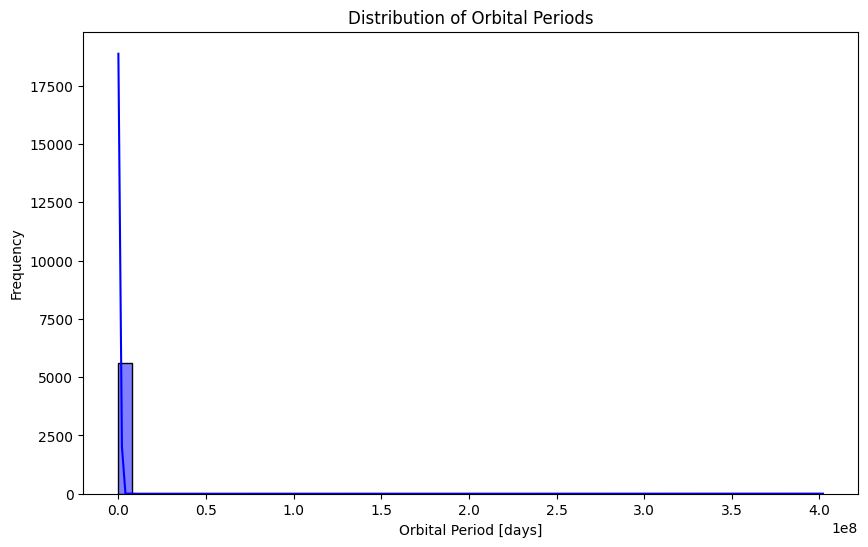

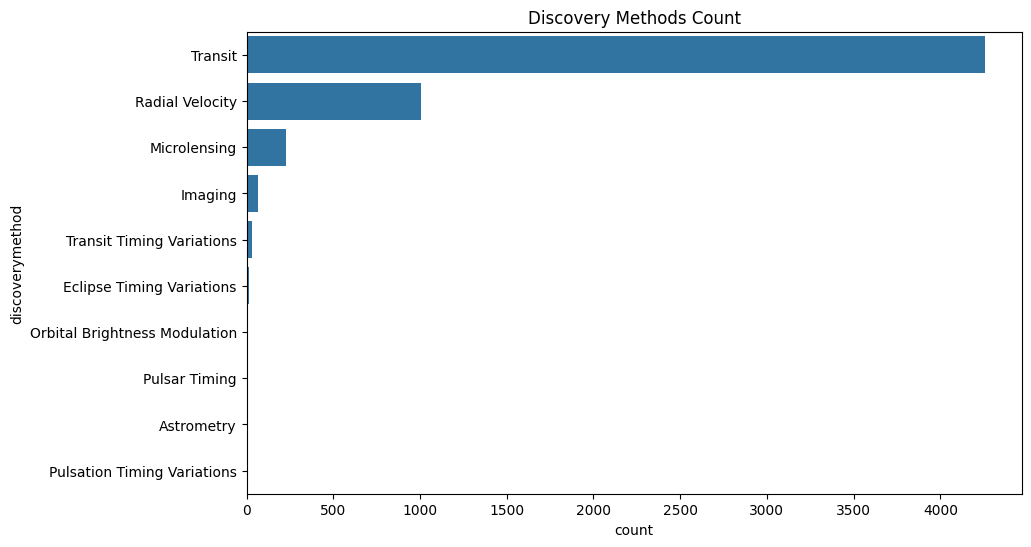

In [4]:
# Example: Orbital Period
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['pl_orbper'], bins=50, kde=True, color='blue')
plt.title("Distribution of Orbital Periods")
plt.xlabel("Orbital Period [days]")
plt.ylabel("Frequency")
plt.show()

# Count plot for categorical data
plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['discoverymethod'], order=data_cleaned['discoverymethod'].value_counts().index)
plt.title("Discovery Methods Count")
plt.show()


In [ ]:
# Check which columns are non-numeric
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)


In [ ]:
# Drop non-numeric columns for correlation computation
data_cleaned_numeric = data_cleaned.drop(columns=non_numeric_cols)

# Now compute correlation on the cleaned dataset
corr_matrix = data_cleaned_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import re
import pandas as pd

# Function to clean HTML tags and convert to NaN if the result is still non-numeric
def clean_html_and_convert_to_nan(text):
    # Remove HTML tags
    clean = re.compile("<.*?>")
    cleaned_text = re.sub(clean, "", str(text))
    
    # Try to convert to a float, if fails, return NaN
    try:
        return float(cleaned_text)
    except ValueError:
        return np.nan  # Convert to NaN if conversion fails

# Apply the function to clean and convert non-numeric columns to NaN
for col in non_numeric_cols:
    data_cleaned[col] = data_cleaned[col].apply(clean_html_and_convert_to_nan)

# Now compute correlation on the cleaned dataset
corr_matrix = data_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Continue working with the cleaned dataset
# print(data_cleaned.head())
# for col in ['pl_rade', 'pl_bmasse']:  # Example numeric columns
#     data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# for col in ['pl_rade_reflink', 'pl_bmasse_reflink']:  # Example categorical columns
#     data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

# print("Remaining missing values (percentage):")
# print(data_cleaned.isnull().sum() / len(data_cleaned) * 100)

In [ ]:
import numpy as np

# Function to solve Kepler's equation for Eccentric Anomaly
def solve_kepler(M, e, tol=1e-6):
    E = M  # Initial guess
    while True:
        delta_E = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta_E
        if abs(delta_E) < tol:
            break
    return E

# Simulate orbital path for one planet
def simulate_orbit(a, e, i, omega, Omega, P, num_points=100):
    # Generate mean anomaly (M) over one period
    mean_anomaly = np.linspace(0, 2 * np.pi, num_points)
    i_rad = np.radians(i)
    omega_rad = np.radians(omega)
    Omega_rad = np.radians(Omega)
    
    # Solve Kepler's equation for Eccentric Anomaly (E)
    E = np.array([solve_kepler(M, e) for M in mean_anomaly])
    
    # True anomaly and radius
    true_anomaly = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
    r = a * (1 - e**2) / (1 + e * np.cos(true_anomaly))
    
    # Orbital position in orbital plane
    x_orb = r * np.cos(true_anomaly)
    y_orb = r * np.sin(true_anomaly)
    z_orb = np.zeros_like(x_orb)
    
    # Rotation matrices for inclination, argument of periastron, and longitude of ascending node
    R_i = np.array([[1, 0, 0],
                    [0, np.cos(i_rad), -np.sin(i_rad)],
                    [0, np.sin(i_rad), np.cos(i_rad)]])
    R_omega = np.array([[np.cos(omega_rad), -np.sin(omega_rad), 0],
                        [np.sin(omega_rad), np.cos(omega_rad), 0],
                        [0, 0, 1]])
    R_Omega = np.array([[np.cos(Omega_rad), -np.sin(Omega_rad), 0],
                        [np.sin(Omega_rad), np.cos(Omega_rad), 0],
                        [0, 0, 1]])
    
    # Full rotation
    rotation_matrix = R_Omega @ R_i @ R_omega
    
    # Apply rotation to transform orbital plane coordinates to 3D space
    orbital_coords = np.dot(rotation_matrix, np.vstack((x_orb, y_orb, z_orb)))
    return orbital_coords


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example: Simulate for one planet
a = 1.0  # Semi-major axis in AU
e = 0.2  # Eccentricity
i = 30   # Inclination in degrees
omega = 45  # Argument of periastron in degrees
Omega = 60  # Longitude of ascending node in degrees
P = 365.25  # Orbital period in days

# Get orbital coordinates
orbit_coords = simulate_orbit(a, e, i, omega, Omega, P)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(orbit_coords[0], orbit_coords[1], orbit_coords[2], label='Orbital Path', color='blue')
ax.scatter([0], [0], [0], color='orange', label='Star', s=100)  # Star at the center
ax.set_title("3D Orbital Path")
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")
plt.legend()
plt.show()


In [ ]:
# Iterate through dataset for multiple planets
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

for _, planet in data_cleaned.iterrows():
    if not np.isnan(planet['pl_orbsmax']) and not np.isnan(planet['pl_orbeccen']):
        a = planet['pl_orbsmax']
        e = planet['pl_orbeccen']
        i = planet.get('pl_orbincl', 0)  # Default to 0 if missing
        omega = planet.get('pl_orblper', 0)  # Default to 0 if missing
        Omega = np.random.uniform(0, 360)  # Random if missing
        P = planet.get('pl_orbper', 365.25)  # Default period if missing
        coords = simulate_orbit(a, e, i, omega, Omega, P)
        ax.plot(coords[0], coords[1], coords[2], alpha=0.6)

ax.set_title("3D Orbits of Multiple Planets")
ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")
ax.set_zlabel("Z [AU]")
plt.show()


In [ ]:
# # Convert non-numeric columns to numeric (if they contain numbers in string format)
# for col in non_numeric_cols:
#     data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')  # Converts invalid entries to NaN

# # Now compute correlation
# corr_matrix = data_cleaned.corr()

# # Plot the correlation heatmap
# plt.figure(figsize=(16, 10))
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()


In [ ]:
# Check for any remaining NaN values
print(data_cleaned.isnull().sum())

# Optionally, drop rows with NaN values for the correlation
data_cleaned_numeric = data_cleaned_numeric.dropna()

# Recompute the correlation matrix
corr_matrix = data_cleaned_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# By using Correlation grsph we got the correlation between the two variables
# Scatter plot for Planetary Radius vs. Mass
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, hue='discoverymethod', alpha=0.7)
plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
plt.xlabel("Planet Radius [Earth Radii]")
plt.ylabel("Planet Mass [Earth Mass]")
plt.legend(loc='best')
plt.show()

In [ ]:
# Check for any remaining NaN values
print(data_cleaned.isnull().sum())

# Optionally, drop rows with NaN values for the correlation
data_cleaned_numeric = data_cleaned_numeric.dropna()

# Recompute the correlation matrix
corr_matrix = data_cleaned_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# # Convert the necessary columns to numeric (force errors to NaN)
# data_cleaned['pl_rade'] = pd.to_numeric(data_cleaned['pl_rade'], errors='coerce')
# data_cleaned['pl_bmasse'] = pd.to_numeric(data_cleaned['pl_bmasse'], errors='coerce')

# # Drop rows with NaN values in specific columns for scatter plot
# data_cleaned = data_cleaned.dropna(subset=['pl_rade', 'pl_bmasse'])

# # Plot the scatter plot again
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, hue='discoverymethod', alpha=0.7)
# plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
# plt.xlabel("Planet Radius [Earth Radii]")
# plt.ylabel("Planet Mass [Earth Mass]")
# plt.legend(loc='best')
# plt.show()


In [ ]:
# Check the basic statistics and ranges of the columns involved
print(data_cleaned[['pl_rade', 'pl_bmasse']].describe())

# Inspect the first few rows
print(data_cleaned[['pl_rade', 'pl_bmasse']].head())


In [ ]:
# # Set axis limits to make sure all data is visible
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, hue='discoverymethod', alpha=0.7)
# plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
# plt.xlabel("Planet Radius [Earth Radii]")
# plt.ylabel("Planet Mass [Earth Mass]")
# plt.xlim(0, 10)  # Set x-axis range if needed
# plt.ylim(0, 100)  # Set y-axis range if needed
# plt.legend(loc='best')
# plt.show()


In [ ]:
# # Check the basic statistics and ranges of the columns involved
# print(data_cleaned[['pl_rade', 'pl_bmasse']].describe())


# Scatter plot without hue to simplify the plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, alpha=0.7)
# plt.title("Planet Radius vs Mass")
# plt.xlabel("Planet Radius [Earth Radii]")
# plt.ylabel("Planet Mass [Earth Mass]")
# plt.show()


# # Check for remaining NaN values
# print(data_cleaned[['pl_rade', 'pl_bmasse']].isnull().sum())

# # Inspect the first few rows to ensure the data looks reasonable
# print(data_cleaned[['pl_rade', 'pl_bmasse']].head())


# # Set axis limits to make sure all data is visible
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_cleaned, hue='discoverymethod', alpha=0.7)
# plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
# plt.xlabel("Planet Radius [Earth Radii]")
# plt.ylabel("Planet Mass [Earth Mass]")
# plt.xlim(0, 10)  # Set x-axis range if needed
# plt.ylim(0, 100)  # Set y-axis range if needed
# plt.legend(loc='best')
# plt.show()




In [ ]:
# # Check the number of rows in the dataset
# print("Number of rows in the dataset:", len(data_cleaned))

# # If the dataset has fewer than 1000 rows, sample all the rows
# data_subset = data_cleaned.sample(n=min(1000, len(data_cleaned)))  # Sample either 1000 or fewer rows

# # Now plot the subset
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='pl_rade', y='pl_bmasse', data=data_subset, hue='discoverymethod', alpha=0.7)
# plt.title("Planet Radius vs Mass (Colored by Discovery Method)")
# plt.xlabel("Planet Radius [Earth Radii]")
# plt.ylabel("Planet Mass [Earth Mass]")
# plt.legend(loc='best')
# plt.show()




In [ ]:
# # Number of discoveries per year
# plt.figure(figsize=(12, 6))
# discovery_trends = data_cleaned['disc_year'].value_counts().sort_index()
# sns.lineplot(x=discovery_trends.index, y=discovery_trends.values)
# plt.title("Number of Discoveries Over Time")
# plt.xlabel("Year")
# plt.ylabel("Number of Discoveries")
# plt.show()

# Star Map: RA vs Dec
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_cleaned['ra'], y=data_cleaned['dec'], alpha=0.5, color='purple')
plt.title("Star Map (RA vs Dec)")
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.show()

# Galactic Coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_cleaned['glon'], y=data_cleaned['glat'], alpha=0.5, color='green')
plt.title("Galactic Coordinates (Longitude vs Latitude)")
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
plt.show()


In [ ]:
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Prepare data
target = 'pl_bmasse'  # Example target column
features = data_cleaned.drop(columns=[target, 'pl_name', 'hostname'])  # Remove non-numerical IDs
X = pd.get_dummies(features, drop_first=True)  # Encode categorical variables
y = data_cleaned[target].dropna()  # Drop missing target values

# Align features and target
X = X.loc[y.index]

# Train a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
importances[:20].plot(kind='bar', color='skyblue')
plt.title("Top 20 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [ ]:
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Prepare data
target = 'pl_bmasse'  # Example target column
features = data_cleaned.drop(columns=[target, 'pl_name', 'hostname'])  # Remove non-numerical IDs
X = pd.get_dummies(features, drop_first=True)  # Encode categorical variables
y = data_cleaned[target].dropna()  # Drop missing target values

# Align features and target
X = X.loc[y.index]

# Train a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
importances[:20].plot(kind='bar', color='skyblue')
plt.title("Top 20 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [ ]:
# Check the number of rows in the dataset
print("Number of rows in the dataset:", len(data_cleaned))

# PRJ